# DNN for key word detection

In [12]:
DATASET_FOLDER = '../dataset/data_restaurant'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(flatten=True)['mfcc']
shape = ds.shape
class_labels = ds.class_labels
shape

(1260, 64, 12, 1)
(540, 64, 12, 1)


(64, 12)

((1260, 768), (540, 768))

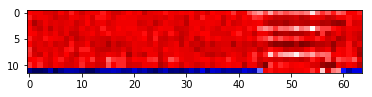

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)), cmap='seismic')
train_data.shape, test_data.shape

### DNN model

In [33]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Dense(100, input_dim=shape[0]*shape[1], activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(100, input_dim=shape[0]*shape[1], activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               76900     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 18)                1818      
Total params: 88,818
Trainable params: 88,818
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

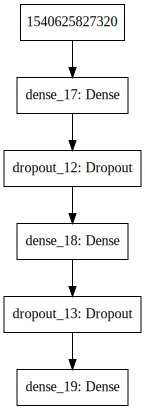

In [35]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training DNN

In [36]:
EPOCHS = 200
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 1260 samples, validate on 540 samples
Epoch 1/200
1260/1260 [==============================] - 1s 462us/step - loss: 12.1732 - acc: 0.1452 - val_loss: 8.1796 - val_acc: 0.2963
Epoch 2/200
1260/1260 [==============================] - 0s 101us/step - loss: 6.8453 - acc: 0.2817 - val_loss: 2.0318 - val_acc: 0.5704
Epoch 3/200
1260/1260 [==============================] - 0s 113us/step - loss: 2.9004 - acc: 0.3849 - val_loss: 1.3330 - val_acc: 0.6333
Epoch 4/200
1260/1260 [==============================] - 0s 89us/step - loss: 1.8756 - acc: 0.5143 - val_loss: 1.1039 - val_acc: 0.7167
Epoch 5/200
1260/1260 [==============================] - 0s 90us/step - loss: 1.3681 - acc: 0.6151 - val_loss: 0.8679 - val_acc: 0.7519
Epoch 6/200
1260/1260 [==============================] - 0s 88us/step - loss: 1.1302 - acc: 0.6706 - val_loss: 0.7931 - val_acc: 0.8130
Epoch 7/200
1260/1260 [==============================] - 0s 89us/step - loss: 0.9597 - acc: 0.7317 - val_loss: 0.6491 - val_acc: 0.85

1260/1260 [==============================] - 0s 126us/step - loss: 0.1260 - acc: 0.9833 - val_loss: 0.4843 - val_acc: 0.9407
Epoch 120/200
1260/1260 [==============================] - 0s 117us/step - loss: 0.0739 - acc: 0.9889 - val_loss: 0.4386 - val_acc: 0.9574
Epoch 121/200
1260/1260 [==============================] - 0s 90us/step - loss: 0.0306 - acc: 0.9937 - val_loss: 0.3555 - val_acc: 0.9537
Epoch 122/200
1260/1260 [==============================] - 0s 103us/step - loss: 0.0782 - acc: 0.9849 - val_loss: 0.3301 - val_acc: 0.9648
Epoch 123/200
1260/1260 [==============================] - 0s 104us/step - loss: 0.0962 - acc: 0.9865 - val_loss: 0.3453 - val_acc: 0.9648
Epoch 124/200
1260/1260 [==============================] - 0s 104us/step - loss: 0.0883 - acc: 0.9881 - val_loss: 0.3067 - val_acc: 0.9648
Epoch 125/200
1260/1260 [==============================] - 0s 103us/step - loss: 0.0750 - acc: 0.9897 - val_loss: 0.3105 - val_acc: 0.9722
Epoch 126/200
1260/1260 [=================

1260/1260 [==============================] - 0s 144us/step - loss: 0.0359 - acc: 0.9937 - val_loss: 0.4940 - val_acc: 0.9537
Epoch 179/200
1260/1260 [==============================] - 0s 141us/step - loss: 0.0493 - acc: 0.9897 - val_loss: 0.4804 - val_acc: 0.9593
Epoch 180/200
1260/1260 [==============================] - 0s 109us/step - loss: 0.0590 - acc: 0.9889 - val_loss: 0.4801 - val_acc: 0.9574
Epoch 181/200
1260/1260 [==============================] - 0s 102us/step - loss: 0.0739 - acc: 0.9897 - val_loss: 0.4471 - val_acc: 0.9611
Epoch 182/200
1260/1260 [==============================] - 0s 105us/step - loss: 0.0479 - acc: 0.9929 - val_loss: 0.4179 - val_acc: 0.9611
Epoch 183/200
1260/1260 [==============================] - 0s 97us/step - loss: 0.0751 - acc: 0.9952 - val_loss: 0.3687 - val_acc: 0.9574
Epoch 184/200
1260/1260 [==============================] - 0s 104us/step - loss: 0.0949 - acc: 0.9841 - val_loss: 0.3775 - val_acc: 0.9630
Epoch 185/200
1260/1260 [=================

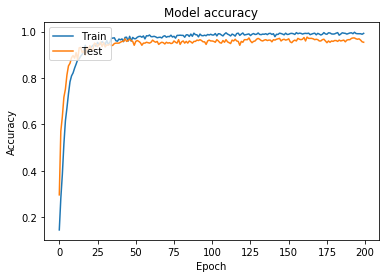

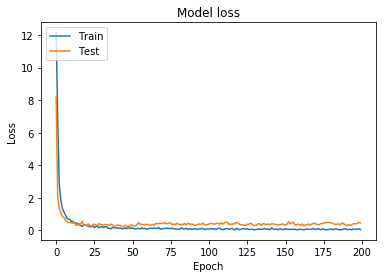

In [37]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [38]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/restaurant_dnn_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [39]:
del model
model = models.load_model(filename)

## Confirmation

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [42]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [43]:
class_labels

['umai',
 'mazui',
 'oishii',
 'silence',
 'others',
 'a',
 'i',
 'o',
 'sushi',
 'sashimi',
 'gyouza',
 'hashi',
 'spoon',
 'fork',
 'syouyu',
 'sakana',
 'niku',
 'gohan']

In [44]:
(activations[-1][:10]*100).astype(int)

array([[  0,   0,   0,   0,   0, 100,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 100],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 100],
       [  0,   0,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 100],
       [  0,   0,   0,   0,   0, 100,

In [45]:
test_labels[:10].astype(int)

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])